In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [10]:
#base_todos = pd.read_csv('https://raw.githubusercontent.com/MadavR/MIAD-VyS/main/EXA_2022-1_Todos.csv', sep=',')
base_todos = pd.read_csv('..\..\data\processed\EXA_2022-1_Todos.csv', sep = ',')

In [12]:
base_todos.head()

,Unnamed: 0,ESTU_CONSECUTIVO,ESTU_FECHAPRESENTACION_x,ESTU_GRADO,ESTU_GENERO,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_NOM_ESTABLECIMIENTO,COLE_NOM_SEDE,COLE_COD_ICFES,...,EXA_PRC_RTAS_NOCORR,ESTU_FECHAPRESENTACION_y,EXA_N_RTAS_CORR_Ciencias_Naturales,EXA_N_RTAS_CORR_Ciencias_Naturales_y_Educación_Ambiental,EXA_N_RTAS_CORR_Competencias_Ciudadanas:_Pensamiento_Ciudadano,EXA_N_RTAS_CORR_Competencias_Comunicativas_en_Lenguaje:Lectura,EXA_N_RTAS_CORR_Inglés,EXA_N_RTAS_CORR_Lectura_Crítica,EXA_N_RTAS_CORR_Matemáticas,EXA_N_RTAS_CORR_Sociales_y_Ciudadanas
0,332,22857330,26/05/2022,3,M,191001000489,191001000489,INSTITUCION EDUCATIVA SAGRADO CORAZON DE JESUS,I.E. SAGRADO CORAZON DE JESUS - SEDE PRINCIPAL,13110,...,60.0,26/05/2022,0,0,0,8,0,0,0,0
1,1758,22857841,24/05/2022,3,F,191001000489,191001000489,INSTITUCION EDUCATIVA SAGRADO CORAZON DE JESUS,I.E. SAGRADO CORAZON DE JESUS - SEDE PRINCIPAL,13110,...,70.0,24/05/2022,0,0,0,6,0,0,10,0
2,526,22861931,26/05/2022,3,F,191001000489,191001000489,INSTITUCION EDUCATIVA SAGRADO CORAZON DE JESUS,I.E. SAGRADO CORAZON DE JESUS - SEDE PRINCIPAL,13110,...,60.0,26/05/2022,0,0,0,8,0,0,0,0
3,1902,22884935,24/05/2022,3,F,191001000489,191001000489,INSTITUCION EDUCATIVA SAGRADO CORAZON DE JESUS,I.E. SAGRADO CORAZON DE JESUS - SEDE PRINCIPAL,13110,...,65.0,24/05/2022,0,0,0,7,0,0,10,0
4,2505,22884936,26/05/2022,3,M,191001000489,191001000489,INSTITUCION EDUCATIVA SAGRADO CORAZON DE JESUS,I.E. SAGRADO CORAZON DE JESUS - SEDE PRINCIPAL,13110,...,30.0,26/05/2022,0,0,0,14,0,0,12,0


In [13]:
base_todos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17885 entries, 0 to 17884
Data columns (total 38 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Unnamed: 0                                                      17885 non-null  int64  
 1   ESTU_CONSECUTIVO                                                17885 non-null  int64  
 2   ESTU_FECHAPRESENTACION_x                                        17885 non-null  object 
 3   ESTU_GRADO                                                      17885 non-null  int64  
 4   ESTU_GENERO                                                     17885 non-null  object 
 5   COLE_COD_DANE_ESTABLECIMIENTO                                   17885 non-null  int64  
 6   COLE_COD_DANE_SEDE                                              17885 non-null  int64  
 7   COLE_NOM_ESTABLECIMIENTO                         

In [14]:
base_todos.describe()

,Unnamed: 0,ESTU_CONSECUTIVO,ESTU_GRADO,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_ICFES,COLE_COD_MCPIO,COLE_COD_DPTO,EXA_CUADERNILLO,EXA_N_PREGUNTAS,...,EXA_PRC_RTAS_CORR,EXA_PRC_RTAS_NOCORR,EXA_N_RTAS_CORR_Ciencias_Naturales,EXA_N_RTAS_CORR_Ciencias_Naturales_y_Educación_Ambiental,EXA_N_RTAS_CORR_Competencias_Ciudadanas:_Pensamiento_Ciudadano,EXA_N_RTAS_CORR_Competencias_Comunicativas_en_Lenguaje:Lectura,EXA_N_RTAS_CORR_Inglés,EXA_N_RTAS_CORR_Lectura_Crítica,EXA_N_RTAS_CORR_Matemáticas,EXA_N_RTAS_CORR_Sociales_y_Ciudadanas
count,17885.000000,1.788500e+04,17885.000000,1.788500e+04,1.788500e+04,17885.000000,17885.000000,17885.000000,17885.0,17885.000000,...,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000
mean,8942.000000,1.791810e+07,6.519318,2.352316e+11,2.345170e+11,24829.901090,95277.227118,95.155438,1.0,20.336595,...,43.337107,55.767962,1.278893,3.813140,3.689069,7.702041,2.128432,1.113056,6.503942,1.069108
std,5163.099118,8.813474e+06,2.387371,6.602748e+10,6.507696e+10,16615.910297,2805.428749,2.700678,0.0,2.884236,...,19.163914,19.122817,3.657157,4.311768,4.280102,4.999548,4.688627,2.929533,3.713388,3.102843
min,0.000000,2.562200e+04,3.000000,1.910010e+11,1.910010e+11,3664.000000,91001.000000,91.000000,1.0,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4471.000000,2.186160e+07,5.000000,1.940010e+11,1.940010e+11,13029.000000,94001.000000,94.000000,1.0,20.000000,...,30.000000,45.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000
50%,8942.000000,2.278524e+07,6.000000,1.950250e+11,1.950250e+11,19505.000000,95001.000000,95.000000,1.0,20.000000,...,40.000000,60.000000,0.000000,3.000000,3.000000,8.000000,0.000000,0.000000,6.000000,0.000000
75%,13413.000000,2.321434e+07,8.000000,2.950010e+11,2.950010e+11,38553.000000,97001.000000,97.000000,1.0,20.000000,...,55.000000,70.000000,0.000000,7.000000,7.000000,11.000000,0.000000,0.000000,9.000000,0.000000
max,17884.000000,2.393242e+07,11.000000,4.997600e+11,4.997600e+11,67047.000000,99773.000000,99.000000,1.0,140.000000,...,100.000000,100.000000,33.000000,30.000000,39.000000,77.000000,40.000000,33.000000,41.000000,34.000000


In [15]:
base_todos.EXA_N_PREGUNTAS.value_counts()

20     17608
40       261
60        11
80         4
140        1
Name: EXA_N_PREGUNTAS, dtype: int64

In [16]:
17608+261+11+4+1, (261+11+4+1)*100/(17608+261+11+4+1)

(17885, 1.5487838971204921)

In [17]:
filtro1 = base_todos['EXA_N_PREGUNTAS'] == 20
base_1 = base_todos[filtro1]
base_1.EXA_N_PREGUNTAS.value_counts()

20    17608
Name: EXA_N_PREGUNTAS, dtype: int64

In [18]:
base_1.columns

Index(['Unnamed: 0', 'ESTU_CONSECUTIVO', 'ESTU_FECHAPRESENTACION_x',
       'ESTU_GRADO', 'ESTU_GENERO', 'COLE_COD_DANE_ESTABLECIMIENTO',
       'COLE_COD_DANE_SEDE', 'COLE_NOM_ESTABLECIMIENTO', 'COLE_NOM_SEDE',
       'COLE_COD_ICFES', 'COLE_NATURALEZA', 'COLE_CALENDARIO', 'COLE_JORNADA',
       'COLE_COD_MCPIO', 'COLE_NOM_MCPIO', 'COLE_COD_DPTO', 'COLE_NOM_DPTO',
       'EXA_CUADERNILLO', 'EXA_MODALIDAD', 'EXA_INSTRUMENTO', 'EXA_COMPONENTE',
       'EXA_COMPETENCIA', 'EXA_N_PREGUNTAS', 'EXA_N_PREGUNTAS_OM',
       'EXA_PRC_PREGUNTAS_OM', 'EXA_N_RTAS_CORR', 'EXA_N_RTAS_NOCORR',
       'EXA_PRC_RTAS_CORR', 'EXA_PRC_RTAS_NOCORR', 'ESTU_FECHAPRESENTACION_y',
       'EXA_N_RTAS_CORR_Ciencias_Naturales',
       'EXA_N_RTAS_CORR_Ciencias_Naturales_y_Educación_Ambiental',
       'EXA_N_RTAS_CORR_Competencias_Ciudadanas:_Pensamiento_Ciudadano',
       'EXA_N_RTAS_CORR_Competencias_Comunicativas_en_Lenguaje:Lectura',
       'EXA_N_RTAS_CORR_Inglés', 'EXA_N_RTAS_CORR_Lectura_Crítica',
       'E

In [19]:
base_1['EXA_N_RTAS_CORR_CN'] = base_1['EXA_N_RTAS_CORR_Ciencias_Naturales'] + base_1['EXA_N_RTAS_CORR_Ciencias_Naturales_y_Educación_Ambiental']
base_1['EXA_N_RTAS_CORR_CC'] = base_1['EXA_N_RTAS_CORR_Competencias_Ciudadanas:_Pensamiento_Ciudadano'] + base_1['EXA_N_RTAS_CORR_Sociales_y_Ciudadanas']
base_1['EXA_N_RTAS_CORR_LC'] = base_1['EXA_N_RTAS_CORR'].astype(int)
base_1['EXA_N_RTAS_CORR_MT'] = base_1['EXA_N_RTAS_CORR_Matemáticas']
base_1.head()

C:\Users\dmrui\AppData\Local\Temp\ipykernel_9936\783883938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_1['EXA_N_RTAS_CORR_CN'] = base_1['EXA_N_RTAS_CORR_Ciencias_Naturales'] + base_1['EXA_N_RTAS_CORR_Ciencias_Naturales_y_Educación_Ambiental']
C:\Users\dmrui\AppData\Local\Temp\ipykernel_9936\783883938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_1['EXA_N_RTAS_CORR_CC'] = base_1['EXA_N_RTAS_CORR_Competencias_Ciudadanas:_Pensamiento_Ciudadano'] + base_1['EXA_N_RTAS_CORR_Sociales_y_Ciud

,Unnamed: 0,ESTU_CONSECUTIVO,ESTU_FECHAPRESENTACION_x,ESTU_GRADO,ESTU_GENERO,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_NOM_ESTABLECIMIENTO,COLE_NOM_SEDE,COLE_COD_ICFES,...,EXA_N_RTAS_CORR_Competencias_Ciudadanas:_Pensamiento_Ciudadano,EXA_N_RTAS_CORR_Competencias_Comunicativas_en_Lenguaje:Lectura,EXA_N_RTAS_CORR_Inglés,EXA_N_RTAS_CORR_Lectura_Crítica,EXA_N_RTAS_CORR_Matemáticas,EXA_N_RTAS_CORR_Sociales_y_Ciudadanas,EXA_N_RTAS_CORR_CN,EXA_N_RTAS_CORR_CC,EXA_N_RTAS_CORR_LC,EXA_N_RTAS_CORR_MT
0,332,22857330,26/05/2022,3,M,191001000489,191001000489,INSTITUCION EDUCATIVA SAGRADO CORAZON DE JESUS,I.E. SAGRADO CORAZON DE JESUS - SEDE PRINCIPAL,13110,...,0,8,0,0,0,0,0,0,8,0
1,1758,22857841,24/05/2022,3,F,191001000489,191001000489,INSTITUCION EDUCATIVA SAGRADO CORAZON DE JESUS,I.E. SAGRADO CORAZON DE JESUS - SEDE PRINCIPAL,13110,...,0,6,0,0,10,0,0,0,6,10
2,526,22861931,26/05/2022,3,F,191001000489,191001000489,INSTITUCION EDUCATIVA SAGRADO CORAZON DE JESUS,I.E. SAGRADO CORAZON DE JESUS - SEDE PRINCIPAL,13110,...,0,8,0,0,0,0,0,0,8,0
3,1902,22884935,24/05/2022,3,F,191001000489,191001000489,INSTITUCION EDUCATIVA SAGRADO CORAZON DE JESUS,I.E. SAGRADO CORAZON DE JESUS - SEDE PRINCIPAL,13110,...,0,7,0,0,10,0,0,0,7,10
4,2505,22884936,26/05/2022,3,M,191001000489,191001000489,INSTITUCION EDUCATIVA SAGRADO CORAZON DE JESUS,I.E. SAGRADO CORAZON DE JESUS - SEDE PRINCIPAL,13110,...,0,14,0,0,12,0,0,0,14,12


In [20]:
variables_interes = ['ESTU_CONSECUTIVO', 'ESTU_GRADO', 'ESTU_GENERO', 'COLE_NOM_ESTABLECIMIENTO', 'COLE_COD_ICFES', 'COLE_NATURALEZA', 'COLE_CALENDARIO', 'COLE_JORNADA', 'COLE_COD_MCPIO', 'COLE_NOM_MCPIO',
                     'COLE_COD_DPTO', 'COLE_NOM_DPTO', 'EXA_MODALIDAD', 'EXA_N_RTAS_CORR_CN', 'EXA_N_RTAS_CORR_CC', 'EXA_N_RTAS_CORR_LC', 'EXA_N_RTAS_CORR_MT']

base_2 = base_1[variables_interes]
base_2.head()

,ESTU_CONSECUTIVO,ESTU_GRADO,ESTU_GENERO,COLE_NOM_ESTABLECIMIENTO,COLE_COD_ICFES,COLE_NATURALEZA,COLE_CALENDARIO,COLE_JORNADA,COLE_COD_MCPIO,COLE_NOM_MCPIO,COLE_COD_DPTO,COLE_NOM_DPTO,EXA_MODALIDAD,EXA_N_RTAS_CORR_CN,EXA_N_RTAS_CORR_CC,EXA_N_RTAS_CORR_LC,EXA_N_RTAS_CORR_MT
0,22857330,3,M,INSTITUCION EDUCATIVA SAGRADO CORAZON DE JESUS,13110,O,A,TARDE,91001,LETICIA,91,AMAZONAS,PA,0,0,8,0
1,22857841,3,F,INSTITUCION EDUCATIVA SAGRADO CORAZON DE JESUS,13110,O,A,TARDE,91001,LETICIA,91,AMAZONAS,PA,0,0,6,10
2,22861931,3,F,INSTITUCION EDUCATIVA SAGRADO CORAZON DE JESUS,13110,O,A,TARDE,91001,LETICIA,91,AMAZONAS,PA,0,0,8,0
3,22884935,3,F,INSTITUCION EDUCATIVA SAGRADO CORAZON DE JESUS,13110,O,A,TARDE,91001,LETICIA,91,AMAZONAS,PA,0,0,7,10
4,22884936,3,M,INSTITUCION EDUCATIVA SAGRADO CORAZON DE JESUS,13110,O,A,TARDE,91001,LETICIA,91,AMAZONAS,PA,0,0,14,12


In [21]:
base_2.columns

Index(['ESTU_CONSECUTIVO', 'ESTU_GRADO', 'ESTU_GENERO',
       'COLE_NOM_ESTABLECIMIENTO', 'COLE_COD_ICFES', 'COLE_NATURALEZA',
       'COLE_CALENDARIO', 'COLE_JORNADA', 'COLE_COD_MCPIO', 'COLE_NOM_MCPIO',
       'COLE_COD_DPTO', 'COLE_NOM_DPTO', 'EXA_MODALIDAD', 'EXA_N_RTAS_CORR_CN',
       'EXA_N_RTAS_CORR_CC', 'EXA_N_RTAS_CORR_LC', 'EXA_N_RTAS_CORR_MT'],
      dtype='object')

In [22]:
filtro_CN = base_2['EXA_N_RTAS_CORR_CN'] < 21
filtro_CC = base_2['EXA_N_RTAS_CORR_CC'] < 21
filtro_LC = base_2['EXA_N_RTAS_CORR_LC'] < 21
filtro_MT = base_2['EXA_N_RTAS_CORR_MT'] < 21

In [23]:
base_3 = base_2[filtro_CN]
base_3 = base_3[filtro_CC]
base_3 = base_3[filtro_LC]
base_3 = base_3[filtro_MT]

base_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17538 entries, 0 to 17884
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ESTU_CONSECUTIVO          17538 non-null  int64 
 1   ESTU_GRADO                17538 non-null  int64 
 2   ESTU_GENERO               17538 non-null  object
 3   COLE_NOM_ESTABLECIMIENTO  17538 non-null  object
 4   COLE_COD_ICFES            17538 non-null  int64 
 5   COLE_NATURALEZA           17538 non-null  object
 6   COLE_CALENDARIO           17538 non-null  object
 7   COLE_JORNADA              17538 non-null  object
 8   COLE_COD_MCPIO            17538 non-null  int64 
 9   COLE_NOM_MCPIO            17538 non-null  object
 10  COLE_COD_DPTO             17538 non-null  int64 
 11  COLE_NOM_DPTO             17538 non-null  object
 12  EXA_MODALIDAD             17538 non-null  object
 13  EXA_N_RTAS_CORR_CN        17538 non-null  int64 
 14  EXA_N_RTAS_CORR_CC    

C:\Users\dmrui\AppData\Local\Temp\ipykernel_9936\3532718038.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  base_3 = base_3[filtro_CC]
C:\Users\dmrui\AppData\Local\Temp\ipykernel_9936\3532718038.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  base_3 = base_3[filtro_LC]
C:\Users\dmrui\AppData\Local\Temp\ipykernel_9936\3532718038.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  base_3 = base_3[filtro_MT]


In [24]:
base_3.COLE_NOM_DPTO.value_counts(), base_3.COLE_NOM_DPTO.value_counts()*100/17538

(GUAVIARE    5570
 VICHADA     4124
 AMAZONAS    3351
 GUAINIA     3140
 VAUPES      1353
 Name: COLE_NOM_DPTO, dtype: int64,
 GUAVIARE    31.759608
 VICHADA     23.514654
 AMAZONAS    19.107082
 GUAINIA     17.903980
 VAUPES       7.714677
 Name: COLE_NOM_DPTO, dtype: float64)

In [25]:
print(base_3[base_3.COLE_NOM_DPTO == 'GUAVIARE'].ESTU_GENERO.value_counts())
print(base_3[base_3.COLE_NOM_DPTO == 'VICHADA'].ESTU_GENERO.value_counts())
print(base_3[base_3.COLE_NOM_DPTO == 'AMAZONAS'].ESTU_GENERO.value_counts())
print(base_3[base_3.COLE_NOM_DPTO == 'GUAINIA'].ESTU_GENERO.value_counts())
print(base_3[base_3.COLE_NOM_DPTO == 'VAUPES'].ESTU_GENERO.value_counts())

F    2865
M    2705
Name: ESTU_GENERO, dtype: int64
F    2080
M    2044
Name: ESTU_GENERO, dtype: int64
M    1693
F    1658
Name: ESTU_GENERO, dtype: int64
M    1593
F    1547
Name: ESTU_GENERO, dtype: int64
M    713
F    640
Name: ESTU_GENERO, dtype: int64


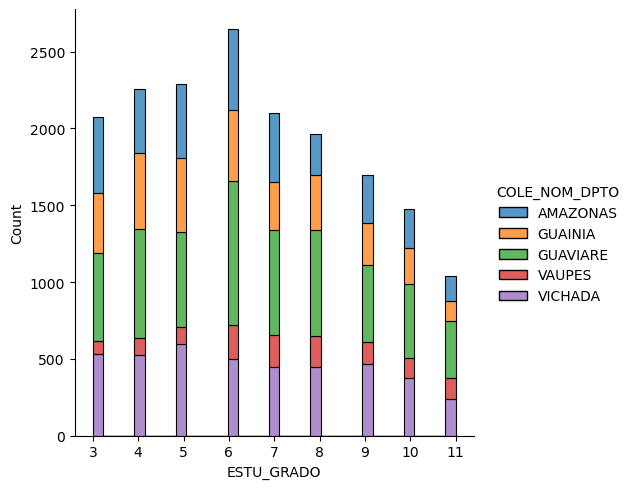

In [26]:
sns.displot(data=base_3, x="ESTU_GRADO", hue='COLE_NOM_DPTO', multiple="stack")

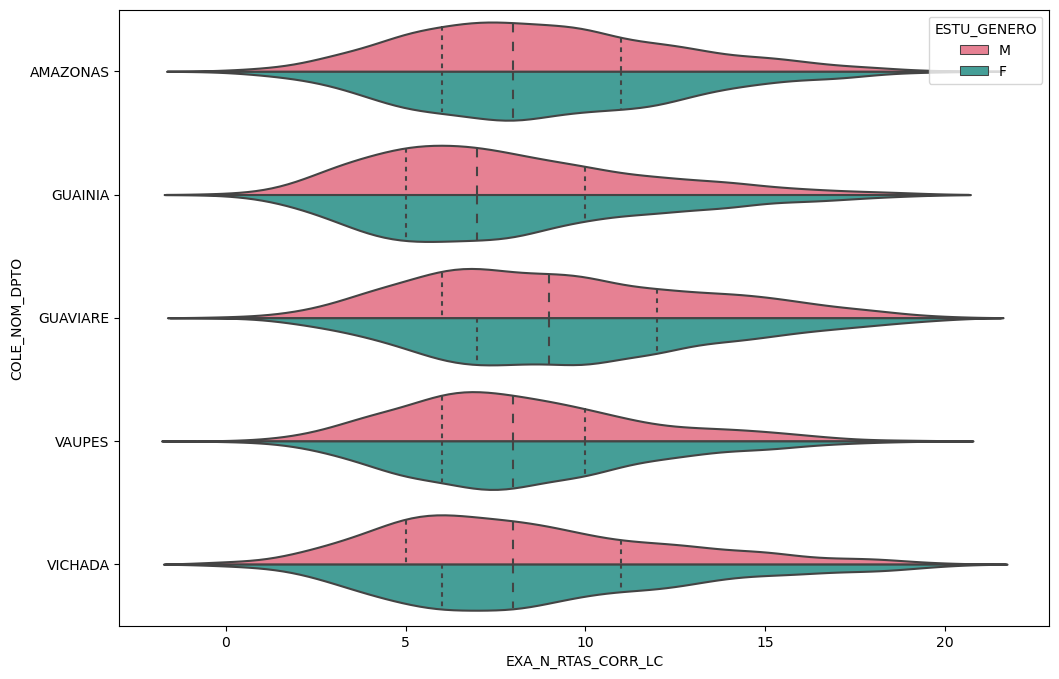

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.violinplot(data=base_3, x = 'EXA_N_RTAS_CORR_LC', y = 'COLE_NOM_DPTO', hue = 'ESTU_GENERO', split=True, inner="quart", palette = 'husl')
plt.show()

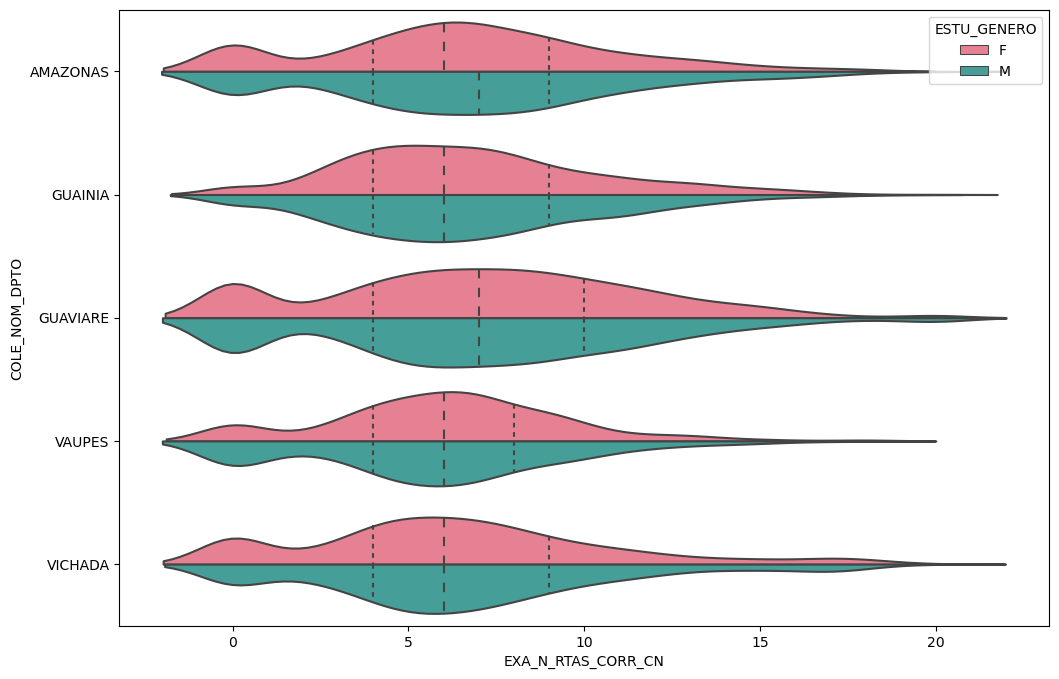

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.violinplot(data=base_3[base_3['ESTU_GRADO']>4], x = 'EXA_N_RTAS_CORR_CN', y = 'COLE_NOM_DPTO', hue = 'ESTU_GENERO', split=True, inner="quart", palette = 'husl')
plt.show()

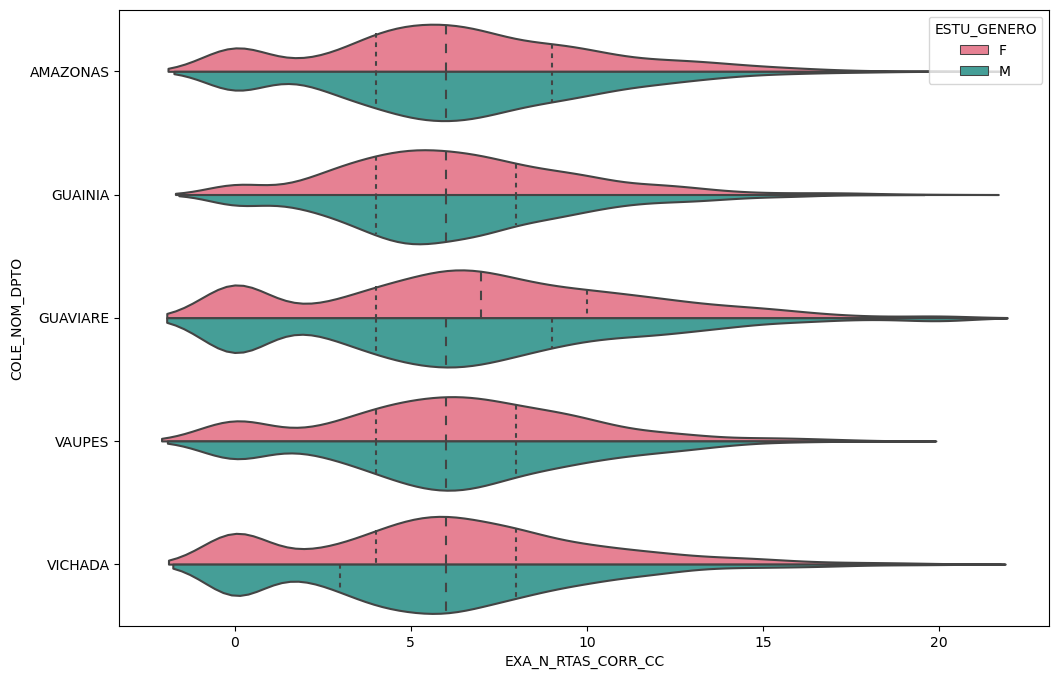

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.violinplot(data=base_3[base_3['ESTU_GRADO']>4], x = 'EXA_N_RTAS_CORR_CC', y = 'COLE_NOM_DPTO', hue = 'ESTU_GENERO', split=True, inner="quart", palette = 'husl')
plt.show()

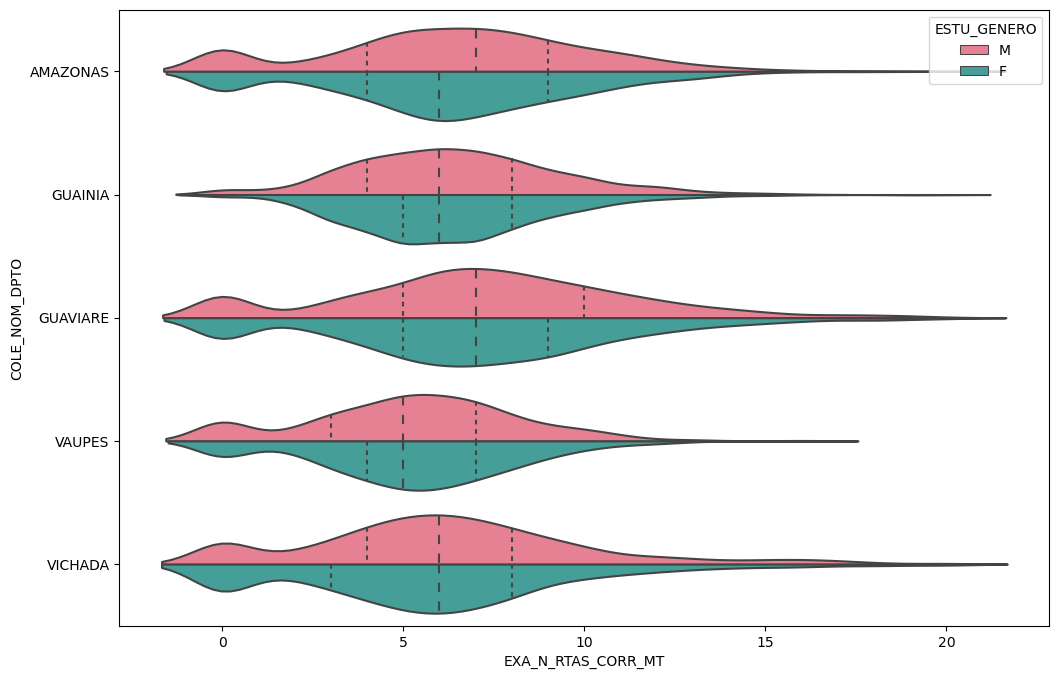

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.violinplot(data=base_3, x = 'EXA_N_RTAS_CORR_MT', y = 'COLE_NOM_DPTO', hue = 'ESTU_GENERO', split=True, inner="quart", palette = 'husl')
plt.show()

<AxesSubplot: xlabel='EXA_N_RTAS_CORR_LC', ylabel='COLE_JORNADA'>

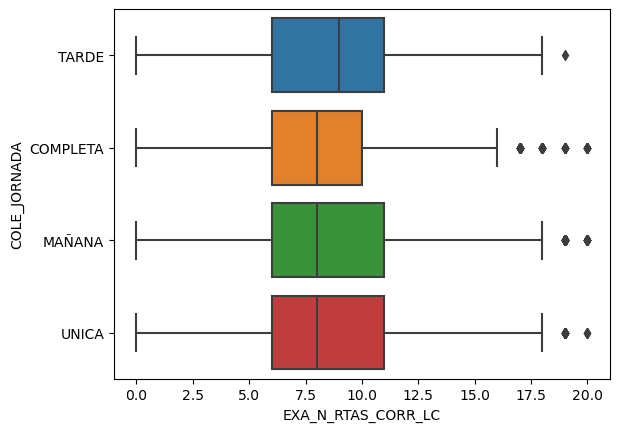

In [31]:
sns.boxplot(data=base_3, x = 'EXA_N_RTAS_CORR_LC', y = 'COLE_JORNADA')

<AxesSubplot: xlabel='EXA_N_RTAS_CORR_CN', ylabel='COLE_JORNADA'>

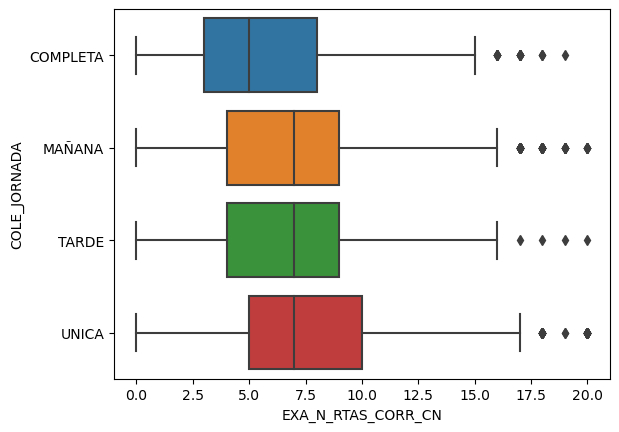

In [32]:
sns.boxplot(data=base_3[base_3['ESTU_GRADO']>4], x = 'EXA_N_RTAS_CORR_CN', y = 'COLE_JORNADA')

<AxesSubplot: xlabel='EXA_N_RTAS_CORR_CC', ylabel='COLE_JORNADA'>

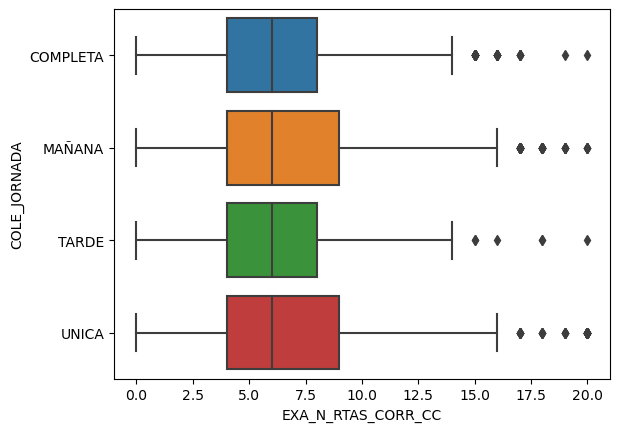

In [33]:
sns.boxplot(data=base_3[base_3['ESTU_GRADO']>4], x = 'EXA_N_RTAS_CORR_CC', y = 'COLE_JORNADA')

<AxesSubplot: xlabel='EXA_N_RTAS_CORR_MT', ylabel='COLE_JORNADA'>

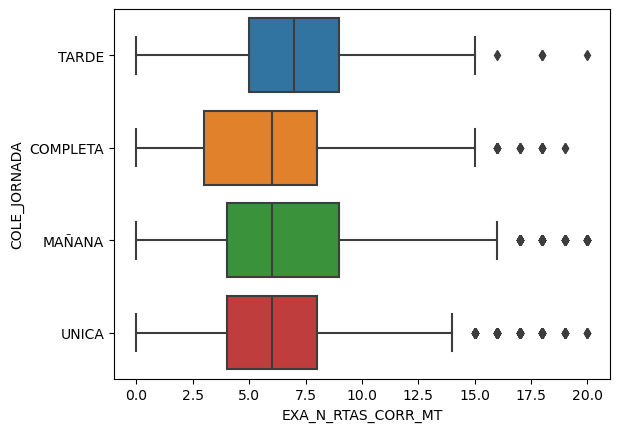

In [34]:
sns.boxplot(data=base_3, x = 'EXA_N_RTAS_CORR_MT', y = 'COLE_JORNADA')

In [ ]:
#base_3.to_csv('EXA_2022_1_Todos_Limp.csv')

In [ ]:
#base_3.columns

Index(['ESTU_CONSECUTIVO', 'ESTU_GRADO', 'ESTU_GENERO',
       'COLE_NOM_ESTABLECIMIENTO', 'COLE_COD_ICFES', 'COLE_NATURALEZA',
       'COLE_CALENDARIO', 'COLE_JORNADA', 'COLE_COD_MCPIO', 'COLE_NOM_MCPIO',
       'COLE_COD_DPTO', 'COLE_NOM_DPTO', 'EXA_MODALIDAD', 'EXA_N_RTAS_CORR_CN',
       'EXA_N_RTAS_CORR_CC', 'EXA_N_RTAS_CORR_LC', 'EXA_N_RTAS_CORR_MT'],
      dtype='object')

In [ ]:
#base_3.head()

,ESTU_CONSECUTIVO,ESTU_GRADO,ESTU_GENERO,COLE_NOM_ESTABLECIMIENTO,COLE_COD_ICFES,COLE_NATURALEZA,COLE_CALENDARIO,COLE_JORNADA,COLE_COD_MCPIO,COLE_NOM_MCPIO,COLE_COD_DPTO,COLE_NOM_DPTO,EXA_MODALIDAD,EXA_N_RTAS_CORR_CN,EXA_N_RTAS_CORR_CC,EXA_N_RTAS_CORR_LC,EXA_N_RTAS_CORR_MT
0,22857330,3,M,INSTITUCION EDUCATIVA SAGRADO CORAZON DE JESUS,13110,O,A,TARDE,91001,LETICIA,91,AMAZONAS,PA,0,0,8,0
1,22857841,3,F,INSTITUCION EDUCATIVA SAGRADO CORAZON DE JESUS,13110,O,A,TARDE,91001,LETICIA,91,AMAZONAS,PA,0,0,6,10
2,22861931,3,F,INSTITUCION EDUCATIVA SAGRADO CORAZON DE JESUS,13110,O,A,TARDE,91001,LETICIA,91,AMAZONAS,PA,0,0,8,0
3,22884935,3,F,INSTITUCION EDUCATIVA SAGRADO CORAZON DE JESUS,13110,O,A,TARDE,91001,LETICIA,91,AMAZONAS,PA,0,0,7,10
4,22884936,3,M,INSTITUCION EDUCATIVA SAGRADO CORAZON DE JESUS,13110,O,A,TARDE,91001,LETICIA,91,AMAZONAS,PA,0,0,14,12
